# Plotting Multiclass Classificatoin results:

### Load dependencies and data:

In [61]:
import pandas as pd
import numpy as np
import boto3

# Create an S3 client instance
s3 = boto3.client('s3')

# Specify the file and bucket names
bucket_name = 'samtfm'
bow = 'multiclass_bow_results_S3.csv'
tfidf = 'multiclass_tfidf_results_S3.csv'
glove = 'multiclass_glove_results_balanced_S3_total.csv'
bert1 = 'multiclass_bert_results_balanced_S3_total(1).csv'
bert2 = 'multiclass_bert_results_balanced_S3_total(2).csv'
roberta1 = 'multiclass_BIOroBERTa_results_balanced_S3_total(1).csv'
roberta2 = 'multiclass_BIOroBERTa_results_balanced_S3_total(2).csv'

for file_name in [bow, tfidf, glove, bert1, bert2, roberta1, roberta2]:
    s3.download_file(bucket_name, file_name, file_name)

# Read csv files as pandas dataframes
bow = pd.read_csv(bow)
tfidf = pd.read_csv(tfidf)
glove = pd.read_csv(glove)
bert1 = pd.read_csv(bert1)
bert2 = pd.read_csv(bert2)
roberta1 = pd.read_csv(roberta1)
roberta2 = pd.read_csv(roberta2)

#### Manipulate data to obtain desired dataframes:

In [62]:
bert = pd.concat([bert1, bert2], axis = 0)
bert = bert.dropna()

In [63]:
roberta = pd.concat([roberta1, roberta2], axis = 0)
roberta = roberta.dropna()

In [64]:
dla = pd.concat([glove, bert, roberta], axis = 0)

In [65]:
dla = dla.dropna()

In [66]:
dla.shape

(73, 11)

#### Check data is correctly loaded:

In [67]:
dla.head()

,train_acc,train_rec,train_f1,test_acc,test_rec,test_f1,batch_size,dropout,lr,epochs,10
0,0.301408,0.469725,0.365584,0.308840,0.448,0.363536,16,0.1,0.001,75,glove_100d
1,0.432360,0.588991,0.494787,0.353712,0.448,0.392456,16,0.1,0.003,75,glove_100d
2,0.553699,0.631193,0.543667,0.352170,0.408,0.373939,16,0.1,0.005,75,glove_100d
3,0.278231,0.436697,0.338623,0.325252,0.448,0.369407,16,0.2,0.001,75,glove_100d
4,0.342974,0.526606,0.412434,0.331784,0.464,0.382637,16,0.2,0.003,75,glove_100d


#### Break down DL-approach dataset into  datasets for every embedding type:

In [68]:
glove = dla[dla['10'] == 'glove_100d']
bert = dla[dla['10'] == 'bert_embeddings_bert_large_uncased_whole_word_masking']
roberta = dla[dla['10'] == 'roberta_embeddings_pmc_med_bio_mlm_roberta_large']

#### Plot mean F1-score for each model (considering all hyperparameter combinations)

In [69]:
model_list = [bow, tfidf, glove, bert, roberta]
model_names = ["BoW", "TF-IDF", "GloVe", "BERT", "BIO-roBERTa"]

In [70]:
mean_test_f1 = [round(np.mean(model.test_f1),3) for model in model_list]

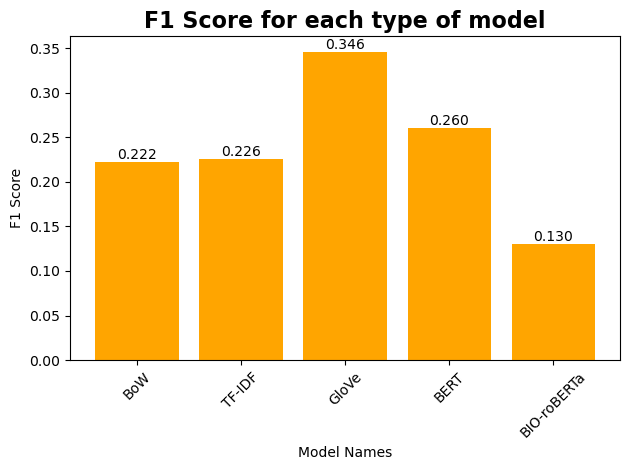

In [71]:
import matplotlib.pyplot as plt
import math

plt.bar(model_names, mean_test_f1, color='orange')
plt.xlabel('Model Names')
plt.ylabel('F1 Score')
plt.title('F1 Score for each type of model', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Add values on top of the bars
for i, value in enumerate(mean_test_f1):
    plt.text(i, value, format(value, ".3f"), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Create df only containing top 5 models of each type:

In [72]:
top10_bow = bow.sort_values(by = ['test_f1'], ascending = False).head(5)

In [73]:
top10_tfidf = tfidf.sort_values(by = ['test_f1'], ascending = False).head(5)

In [74]:
top10_glove = glove.sort_values(by = ['test_f1'], ascending = False).head(5)

In [75]:
top10_bert = bert.sort_values(by = ['test_f1'], ascending = False).head(5)

In [76]:
top10_roberta = roberta.sort_values(by = ['test_f1'], ascending = False).head(5)

#### Plot mean F1-score for top 5 models of each type:

In [78]:
top_model_list = [top10_bow, top10_tfidf, top10_glove, top10_bert, top10_roberta]
model_names = ["BoW", "TF-IDF", "GloVe", "BERT", "BIO-roBERTa"]

In [79]:
mean_top_test_f1 = [round(np.mean(model.test_f1),3) for model in top_model_list]

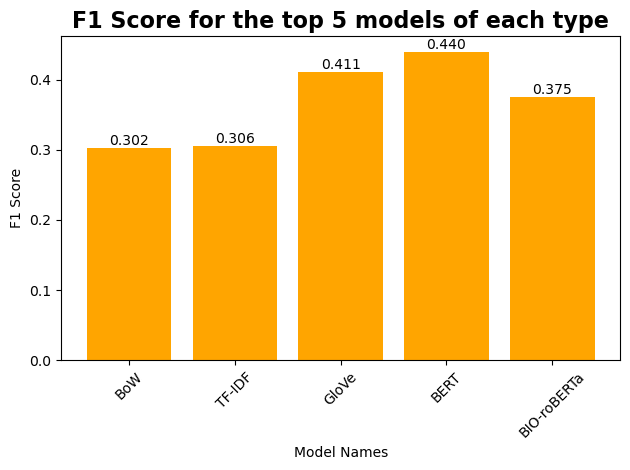

In [81]:
import matplotlib.pyplot as plt
import math

plt.bar(model_names, mean_top_test_f1, color='orange')
plt.xlabel('Model Names')
plt.ylabel('F1 Score')
plt.title('F1 Score for the top 5 models of each type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Add values on top of the bars
for i, value in enumerate(mean_top_test_f1):
    plt.text(i, value, format(value, ".3f"), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Create dataframe with DL-based models with f1-score > 0.85:

In [77]:
top_total_dla = dla.sort_values(by = ['test_f1'], ascending = False).head(17)

In [83]:
top_total_dla

,embeddings,batch_size,dropout,learning_rate,epochs,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
13,bert,4,0.1,0.003,75,0.532558,0.695413,0.600027,0.423011,0.488,0.448566
6,bert,8,0.1,0.001,75,0.526018,0.693578,0.595935,0.408062,0.488,0.443040
1,bert,16,0.1,0.003,75,0.526647,0.678899,0.588322,0.440110,0.472,0.442309
4,bert,16,0.2,0.003,75,0.514237,0.671560,0.579953,0.413541,0.480,0.440782
13,glove,4,0.1,0.003,75,0.510142,0.614679,0.550519,0.399111,0.464,0.425759
0,bert,16,0.1,0.001,75,0.505946,0.664220,0.570814,0.386266,0.472,0.424158
22,glove,2,0.2,0.003,75,0.546778,0.614679,0.532003,0.396828,0.464,0.423865
7,bert,8,0.1,0.003,75,0.615825,0.735780,0.664735,0.426093,0.448,0.420032
3,bert,2,0.2,0.001,75,0.528115,0.693578,0.596785,0.386132,0.448,0.412344
0,bert,2,0.1,0.001,75,0.662859,0.750459,0.698280,0.412344,0.424,0.410959


#### Clean format of the resulting dataset:

In [82]:
top_total_dla.columns = ['train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1',
       'batch_size', 'dropout', 'learning_rate', 'epochs', 'embeddings']
top_total_dla = top_total_dla[['embeddings','batch_size', 'dropout', 'learning_rate', 'epochs', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
top_total_dla["embeddings"] =[emb.split("_")[0] for emb in  top_total_dla["embeddings"]]

In [85]:
top_total_dla = top_total_dla.drop(["train_precision", "train_recall", "test_precision", "test_recall"], axis = 1)

In [86]:
top_total_dla

,embeddings,batch_size,dropout,learning_rate,epochs,train_f1,test_f1
13,bert,4,0.1,0.003,75,0.600027,0.448566
6,bert,8,0.1,0.001,75,0.595935,0.443040
1,bert,16,0.1,0.003,75,0.588322,0.442309
4,bert,16,0.2,0.003,75,0.579953,0.440782
13,glove,4,0.1,0.003,75,0.550519,0.425759
0,bert,16,0.1,0.001,75,0.570814,0.424158
22,glove,2,0.2,0.003,75,0.532003,0.423865
7,bert,8,0.1,0.003,75,0.664735,0.420032
3,bert,2,0.2,0.001,75,0.596785,0.412344
0,bert,2,0.1,0.001,75,0.698280,0.410959


#### Plot a pie chart showing the proportion of each embedding type in the top DL-based models

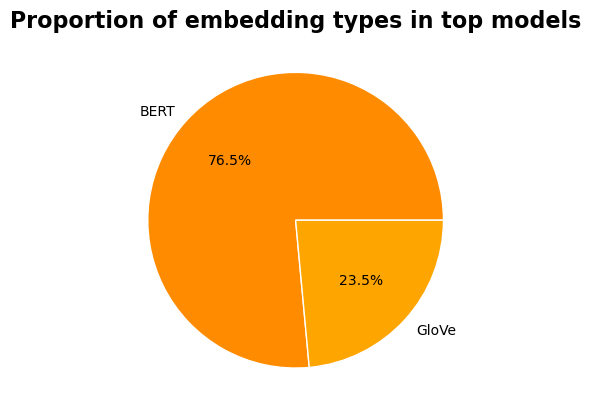

In [84]:
import matplotlib.pyplot as plt

# Value list
lista_clases = top_total_dla["embeddings"]

# Create dictionary to store ocurrences
ocurrencias = {}

# Calculate number of ocurrences of each class
for clase in lista_clases:
    ocurrencias[clase] = ocurrencias.get(clase, 0) + 1

# Obtain classes and ocurrences
clases = list(ocurrencias.keys())
clases = ["BERT", "GloVe"]
ocurrencias_clases = list(ocurrencias.values())

# Create orange palette
colores = ['#FF8C00', '#FFA500', '#FFB74D']

# Create and customize pie chart
plt.pie(ocurrencias_clases, labels=clases, autopct='%1.1f%%', colors=colores,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Proportion of embedding types in top models", fontsize=16, fontweight='bold')
plt.show()


#### Get expression in latex for a table showing the best models and their metrics:

In [87]:
# Generate table in LaTeX format
tabla_latex = top_total_dla.head(10).to_latex(index=False)

# Print table
print(tabla_latex)

\begin{tabular}{lrrrrrr}
\toprule
embeddings & batch_size & dropout & learning_rate & epochs & train_f1 & test_f1 \\
\midrule
bert & 4 & 0.100000 & 0.003000 & 75 & 0.600027 & 0.448566 \\
bert & 8 & 0.100000 & 0.001000 & 75 & 0.595935 & 0.443040 \\
bert & 16 & 0.100000 & 0.003000 & 75 & 0.588322 & 0.442309 \\
bert & 16 & 0.200000 & 0.003000 & 75 & 0.579953 & 0.440782 \\
glove & 4 & 0.100000 & 0.003000 & 75 & 0.550519 & 0.425759 \\
bert & 16 & 0.100000 & 0.001000 & 75 & 0.570814 & 0.424158 \\
glove & 2 & 0.200000 & 0.003000 & 75 & 0.532003 & 0.423865 \\
bert & 8 & 0.100000 & 0.003000 & 75 & 0.664735 & 0.420032 \\
bert & 2 & 0.200000 & 0.001000 & 75 & 0.596785 & 0.412344 \\
bert & 2 & 0.100000 & 0.001000 & 75 & 0.698280 & 0.410959 \\
\bottomrule
\end{tabular}

